# Analysis using the sacred runs

In [1]:
import pandas as pd
import numpy as np
import glob, sys, json, re
import matplotlib.pyplot as plt
import scipy.stats as sts

First, we need to load all the runs in memory, so we can index and filter them depending on the parameters.

In [2]:
BASE_DIR = '../sacred_runs/'
runs = {}
runs_filenames = glob.glob(BASE_DIR + '*/config.json')
run_extractor = re.compile(BASE_DIR + '([0-9]+)/config.json')
for r in runs_filenames:
    run_number = int(run_extractor.match(r).group(1))
    runs[run_number] = {}
    runs[run_number]['config'] = json.load(open(BASE_DIR + str(run_number) + '/config.json'))
    runs[run_number]['run'] = json.load(open(BASE_DIR + str(run_number) + '/run.json'))
    runs[run_number]['metrics'] = json.load(open(BASE_DIR + str(run_number) + '/metrics.json'))

Now, all the runs are inside the runs dict, with their relative config, run and metrics file. We can now extract information about them. To make our life easier, we create a simple function to filter the runs directly.

In [3]:
def filter_runs(query):
    keys = list(runs.keys())
    for key, value in query.items():
        # Key is provided in dot notation, so we should split it
        k1, k2 = key.split('.')
        # Check if the still unfiltered runs have the specified parameter. If not, remove them
        keys = [run_key for run_key in keys if runs[run_key][k1][k2] == value]
    # Now create a filtered object only with the selected runs
    _runs = {key: runs[key] for key in keys}
    return _runs

**TODO:** this should be inserted in a class

Also, we need to replicate the matplotlib function to extract mean and confidence interval from many runs.

In [15]:
def plot_mean_ci(my_runs, metric, conf=0.95):
    # Extract the metric
    metric_matrix = np.array([value['metrics'][metric]['values'] for key, value in my_runs.items()])
    # Get mean and ci
    mean = np.mean(metric_matrix, axis=0)
    std = np.std(metric_matrix, axis=0)
    interval = sts.t.interval(conf, metric_matrix.shape[0]-1, loc=mean, scale=std/np.sqrt(metric_matrix.shape[0]))
    fig = plt.figure(figsize=(16,4))
    plt.plot(mean)
    plt.fill_between(range(len(mean)),interval[0], interval[1], alpha=0.3)
    plt.show();
    
def plot_all(my_runs, metric):
    # Extract the metric
    metric_matrix = np.array([value['metrics'][metric]['values'] for key, value in my_runs.items()])
    fig = plt.figure(figsize=(16,4))
    for i in range(metric_matrix.shape[0]):
        plt.plot(metric_matrix[i])
    plt.show();

## Inverted-Pendulum POIS baseline
We first start by plotting the baseline.

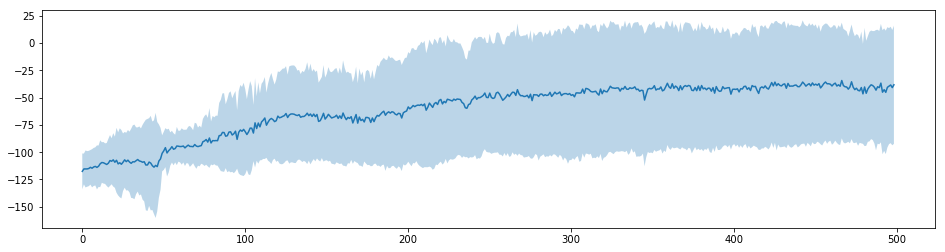

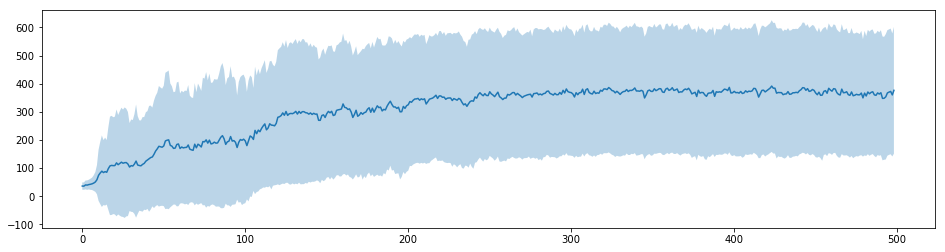

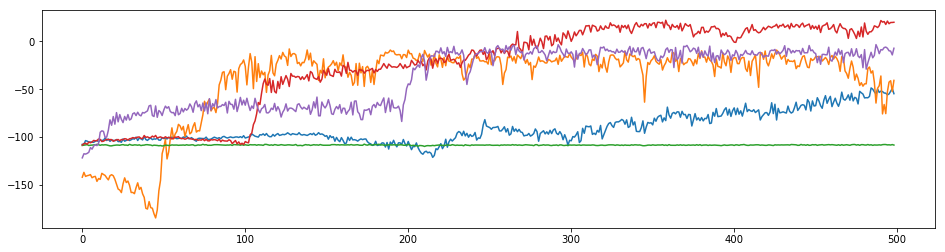

In [17]:
# Define the baseline params
baseline_runs = filter_runs({
    'config.entropy': '0:0',
    'config.center': True,
    'config.env': 'inverted-pendulum',
    'config.iw_method': 'is',
    'config.iw_norm': 'none',
    'config.delta': 0.9,
    'config.bound': 'max-d2',
    'config.gamma': 0.99,
    'config.clipping': False,
    'config.njobs': 1,
    'config.natural': False,
    'config.policy': 'linear',
    'config.num_episodes': 100,
    'run.status': 'COMPLETED'
})
# Extract the metrics we are interested in, plotting the mean with confidence bound
if len(baseline_runs.keys()) > 0:
    plot_mean_ci(baseline_runs, 'EpRewMean')
    plot_mean_ci(baseline_runs, 'EpLenMean')
    plot_all(baseline_runs, 'EpRewMean')

Extracted 5 experiments.


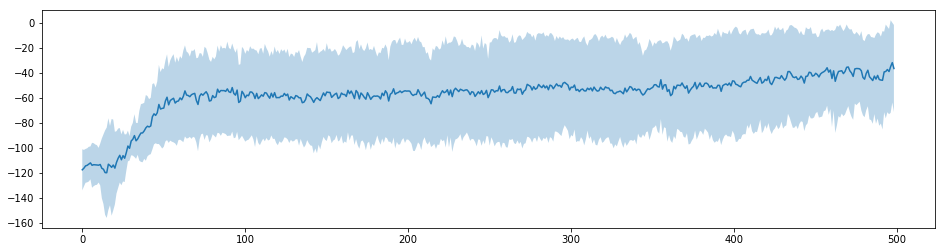

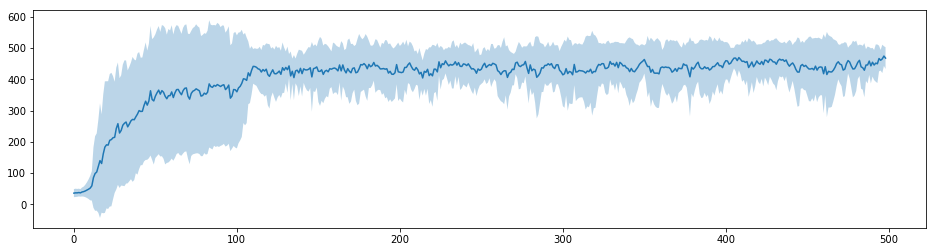

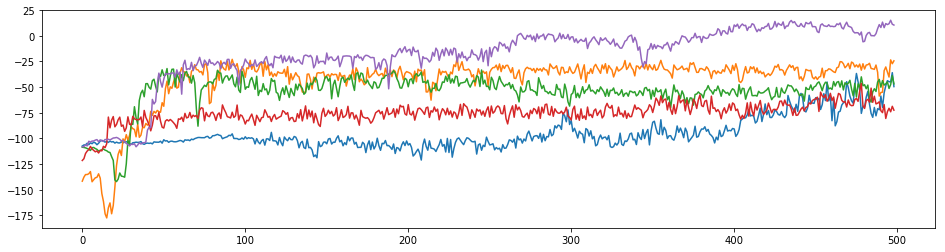

In [19]:
# Define the baseline params
exp_runs = filter_runs({
    'config.entropy': 'step:10.0:100',
    'config.center': True,
    'config.env': 'inverted-pendulum',
    'config.iw_method': 'is',
    'config.iw_norm': 'none',
    'config.delta': 0.9,
    'config.bound': 'max-d2',
    'config.gamma': 0.99,
    'config.clipping': False,
    'config.njobs': 1,
    'config.natural': False,
    'config.policy': 'linear',
    'config.num_episodes': 100,
    'run.status': 'COMPLETED'
})
# Extract the metrics we are interested in, plotting the mean with confidence bound
print("Extracted", len(exp_runs.keys()), 'experiments.')
if len(exp_runs.keys()) > 0:
    plot_mean_ci(exp_runs, 'EpRewMean')
    plot_mean_ci(exp_runs, 'EpLenMean')
    plot_all(exp_runs, 'EpRewMean')